
Jumlah Buku yang Dipinjam dan Nama Bukunya:
Pemrograman Rekursif dan Iteratif: 5 kali dipinjam
Manajemen Basis Data: 5 kali dipinjam
Pengolahan Citra Digital: 5 kali dipinjam
Data Mining dan Penerapannya: 5 kali dipinjam
Optimasi Algoritma untuk Data Science: 5 kali dipinjam
Statistika untuk Data Analyst: 5 kali dipinjam
Pengantar Machine Learning: 4 kali dipinjam
Sistem Informasi Perpustakaan: 4 kali dipinjam
Pemrograman Python Dasar: 3 kali dipinjam
Struktur Data dan Algoritma: 3 kali dipinjam
Manajemen Proyek IT: 3 kali dipinjam
Pemodelan Machine Learning: 3 kali dipinjam
Pemrograman Web dengan Python: 2 kali dipinjam
Arsitektur Database: 2 kali dipinjam
Logika dan Algoritma Pemrograman: 2 kali dipinjam
Kecerdasan Buatan untuk Pemula: 1 kali dipinjam
Analisis Data Statistik: 1 kali dipinjam
Keamanan Sistem Informasi: 1 kali dipinjam
Konsep Perpustakaan Digital: 1 kali dipinjam
Big Data dan Analisis: 1 kali dipinjam


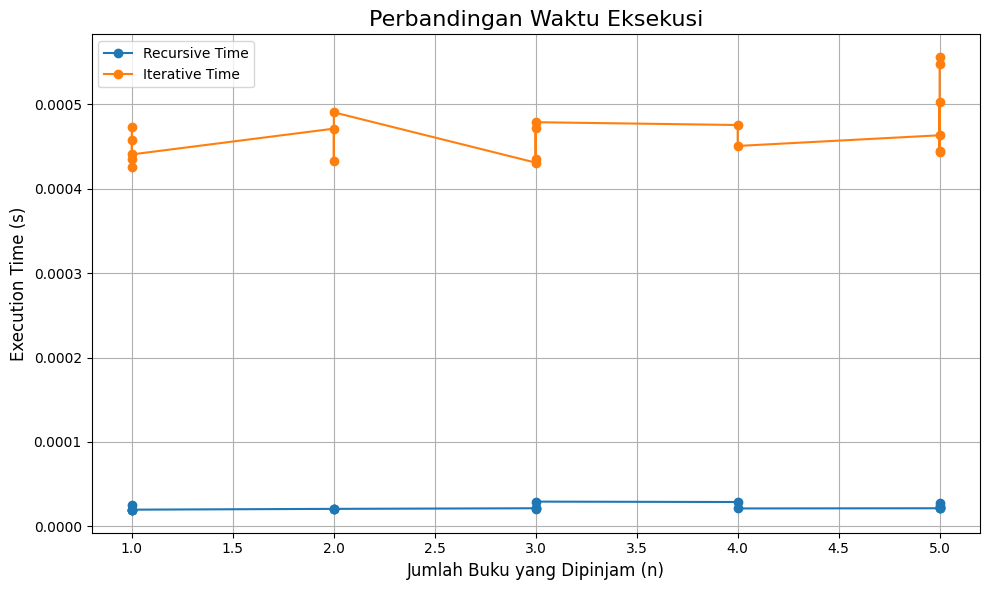


Hasil Perhitungan Waktu Eksekusi:
 n  Recursive Time (s)  Iterative Time (s)  Total Iterative  Total Recursive
 5            0.000028            0.000556                5                5
 5            0.000024            0.000548                5                5
 5            0.000021            0.000443                5                5
 5            0.000023            0.000503                5                5
 5            0.000022            0.000445                5                5
 5            0.000021            0.000463                5                5
 4            0.000021            0.000451                4                4
 4            0.000029            0.000475                4                4
 3            0.000029            0.000479                3                3
 3            0.000020            0.000435                3                3
 3            0.000022            0.000471                3                3
 3            0.000021            0.00043

In [13]:
import time
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/data_peminjaman_buku_Perpustakaan_.csv'
try:
    data = pd.read_csv(file_path)
except Exception as e:
    print(f"Error membaca file: {e}")
    exit()

data = data.rename(columns=lambda x: x.strip())
if 'Nama Buku' not in data.columns:
    raise ValueError("Kolom 'Nama Buku' tidak ditemukan pada data!")

#Menghapus nilai NaN atau duplikat
data = data.dropna(subset=['Nama Buku'])
data['Nama Buku'] = data['Nama Buku'].str.strip()

# Menghitung jumlah total buku yang dipinjam
loan_counts = data['Nama Buku'].value_counts()
n_values = loan_counts.values

# Menampilkan Jumlah Buku yang Dipinjam dan Nama Buku
print("\nJumlah Buku yang Dipinjam dan Nama Bukunya:")
for book, count in loan_counts.items():
    print(f"{book}: {count} kali dipinjam")

# 1. Menghitung Popularitas Buku dengan Iterasi dan Rekursi
results = []

for n in n_values:
    # Membatasi data hingga jumlah n buku yang dipinjam
    subset_data = data.head(n)

    # Pendekatan Iteratif
    start_time_iterative = time.time()
    iterative_result = subset_data['Nama Buku'].value_counts()
    total_iterative = iterative_result.sum()
    end_time_iterative = time.time()

    # Pendekatan Rekursif
    def calculate_popularity_recursive(data_list, book_counts=None, index=0):
        if book_counts is None:
            book_counts = {}
        if index >= len(data_list):
            return book_counts
        book = data_list[index]
        book_counts[book] = book_counts.get(book, 0) + 1
        return calculate_popularity_recursive(data_list, book_counts, index + 1)

    start_time_recursive = time.time()
    recursive_result = calculate_popularity_recursive(subset_data['Nama Buku'].tolist())
    total_recursive = sum(recursive_result.values())
    end_time_recursive = time.time()

    # Menyimpan hasil waktu eksekusi dan total buku dipinjam
    results.append({
        'n': n,
        'Recursive Time (s)': end_time_recursive - start_time_recursive,
        'Iterative Time (s)': end_time_iterative - start_time_iterative,
        'Total Iterative': total_iterative,
        'Total Recursive': total_recursive
    })

# 2. Membuat Grafik Perbandingan Waktu Eksekusi
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['n'], results_df['Recursive Time (s)'], marker='o', label='Recursive Time')
plt.plot(results_df['n'], results_df['Iterative Time (s)'], marker='o', label='Iterative Time')
plt.xlabel('Jumlah Buku yang Dipinjam (n)', fontsize=12)
plt.ylabel('Execution Time (s)', fontsize=12)
plt.title('Perbandingan Waktu Eksekusi', fontsize=16)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3. Menampilkan Hasil dalam Bentuk Tabel
print("\nHasil Perhitungan Waktu Eksekusi:")
print(results_df.to_string(index=False))

# 4. Membandingkan Efisiensi
average_recursive_time = results_df['Recursive Time (s)'].mean()
average_iterative_time = results_df['Iterative Time (s)'].mean()

if average_iterative_time < average_recursive_time:
    print("Pendekatan Iteratif lebih efektif berdasarkan waktu rata-rata.")
else:
    print("Pendekatan Rekursif lebih efektif berdasarkan waktu rata-rata.")